In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv("https://github.com/MyungKyuYi/AI-class/raw/main/AAME.csv")
print(df.head())

         Date  Open  High   Low  Close  Adj Close  Volume
0  1980-03-17   0.0  4.05  3.85   3.85   3.213167   15000
1  1980-03-18   0.0  4.00  3.80   3.80   3.171437   10200
2  1980-03-19   0.0  4.05  3.85   3.85   3.213167   33500
3  1980-03-20   0.0  4.00  3.80   3.80   3.171437    8700
4  1980-03-21   0.0  3.95  3.75   3.75   3.129709   12700


In [3]:
openValues = df[['Open']]

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues)

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [6]:
TEST_SIZE = 1000
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

In [7]:
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, input_shape=(X_train.shape[1], 1), activation = 'tanh', return_sequences = False))
model.add(Dense(1))

C:\Users\gustj\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 50, batch_size = 16)

Epoch 1/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.0109
Epoch 2/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0032
Epoch 3/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 0.0025
Epoch 4/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0026
Epoch 5/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 0.0024
Epoch 6/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0027 
Epoch 7/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - loss: 0.0028
Epoch 8/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - loss: 0.0023    
Epoch 9/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0023    
Epoch 10/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - loss: 0.0022    
Epoch 11/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - loss: 0.0022    
Epoch 12/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - loss: 0.0026
Epoch 13/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - loss: 0.0022
Epoch 14/50
567/567 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 0.0021     
Epoch 15/50
56

In [10]:
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step 


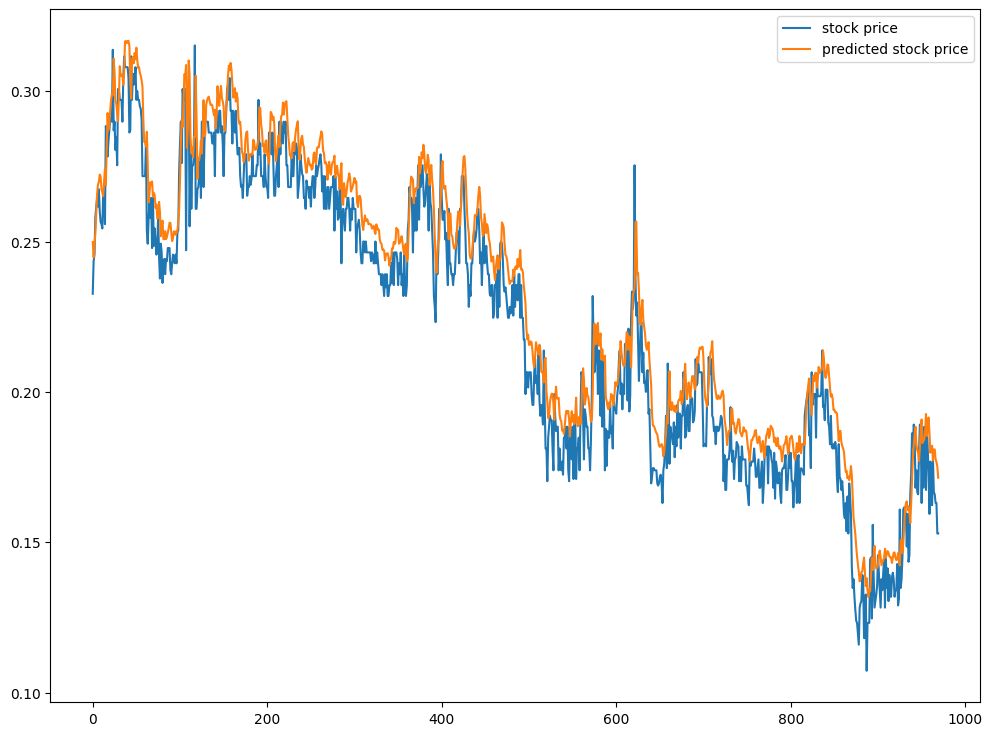

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize = (12, 9))
plt.plot(y_test, label = 'stock price')
plt.plot(pred, label = 'predicted stock price')
plt.legend()
plt.show()

In [12]:
model.evaluate(X_test, y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 1.7314e-04   


0.00017586519243195653